# Modelo Desicion tree

In [129]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Cargamos los datos de entrada del archivo .csv Train

In [130]:
# Load data
train = pd.read_csv('../data/Processed/train_processed.csv', sep=',')
df_train=pd.DataFrame(train)
df_train

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Cabin_Side_P,Cabin_Side_S,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T
0,0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,...,1,0,0,1,0,0,0,0,0,0
1,0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,...,0,1,0,0,0,0,0,1,0,0
2,0003_01,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,...,0,1,1,0,0,0,0,0,0,0
3,0003_02,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,...,0,1,1,0,0,0,0,0,0,0
4,0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,False,...,1,0,1,0,0,0,0,0,0,0
8689,9278_01,1,18.0,0,0.0,0.0,0.0,0.0,0.0,False,...,0,1,0,0,0,0,0,0,1,0
8690,9279_01,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,True,...,0,1,0,0,0,0,0,0,1,0
8691,9280_01,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,False,...,0,1,0,0,0,0,1,0,0,0


In [131]:
# Definimos las variables que me guardan los datos a entrenar separados del target 
y=df_train['Transported']

X=df_train[['PassengerId', 'CryoSleep', 'Age','VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Earth','Europa','Mars','Cabin_num','Cabin_Deck_A','Cabin_Deck_B','Cabin_Deck_C','Cabin_Deck_D',
       'Cabin_Deck_E','Cabin_Deck_F','Cabin_Deck_G','Cabin_Deck_T','Cabin_Side_P','Cabin_Side_S']]

In [132]:
#Separamos los datos 70% Train, 30% Test (Es la proporcion pedida en Kaggel)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

print(f"X_train: {X_train.shape}\ty_train: {y_train.shape}")
print(f"X_test: {X_test.shape}\ty_test: {y_test.shape}")

X_train: (6085, 23)	y_train: (6085,)
X_test: (2608, 23)	y_test: (2608,)


In [133]:
# Creamos el modelo y lo entrenamos (DecisionTreeClassifier)** with a maximum depth of 3, and evaluate the accuracy metric on the test data.
#  Use parameter **random_state = 17** for results reproducibility.

tree = DecisionTreeClassifier(max_depth=3, random_state=17, class_weight='balanced')
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=17)

In [134]:
# Hacemos la prediccion

tree_predictions = tree.predict(X_test) 
print("ACCURACY TEST:", accuracy_score(y_test, tree_predictions))

ACCURACY TEST: 0.7296779141104295


### 3.2 Decision tree with parameter tuning

In [135]:
#Buscamos con un bucle, el parametro que mejor resultaods da para aplicarle mas adelante de manera individual y comparar los scores
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

tree_params = {'max_depth': range(2, 11)}

locally_best_tree = GridSearchCV(DecisionTreeClassifier(random_state=17),
                                 tree_params, cv=5)                  

locally_best_tree.fit(X_train, y_train)
print("Best params:", locally_best_tree.best_params_)
print("Best cross validaton score", locally_best_tree.best_score_)

Best params: {'max_depth': 8}
Best cross validaton score 0.7687756778964667


In [136]:
# Cramos el modelo con el parametro max_depth=3 y vemos cuanto sale para poder comparar mas abajo con el parametro recomentado(8)
tree = DecisionTreeClassifier(max_depth=3, random_state=17)
tree.fit(X_train, y_train)
tree_predictions = tree.predict(X_test) 
print("Cross Validation Score (Max_depth=3)",accuracy_score(y_test, tree_predictions))

Cross Validation Score (Max_depth=3) 0.7296779141104295


In [137]:
# y aqui ya aplicamos el max_deph recomendado, que es 8 y efectivamente da el mayor Score posible :) aplicamos este mpdelo al CSV Test
tuned_tree = DecisionTreeClassifier(max_depth=8, random_state=17, criterion='entropy', min_samples_split=65, min_samples_leaf=4, min_weight_fraction_leaf=0, max_leaf_nodes=50)
tuned_tree.fit(X_train, y_train)
tuned_tree_predictions = tuned_tree.predict(X_test)
print("Cross Validation Score (max_depth=8)",accuracy_score(y_test, tuned_tree_predictions))

Cross Validation Score (max_depth=8) 0.7983128834355828


## Visualizamos los datos

In [138]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [139]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import sklearn

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=11,
                                  random_state=17)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=11, random_state=17)

In [140]:
tuned_tree.feature_importances_

array([0.01332063, 0.38102945, 0.01575274, 0.        , 0.0559938 ,
       0.07559889, 0.01665647, 0.10157895, 0.09676413, 0.10657292,
       0.02062809, 0.        , 0.03665389, 0.        , 0.        ,
       0.00768466, 0.        , 0.04615761, 0.00133821, 0.        ,
       0.        , 0.        , 0.02426957])

In [141]:
def graph_feat(model,X):
    feat_impor = pd.DataFrame(model.feature_importances_)
    fimport = feat_impor.set_axis(X.columns, axis='index')
    fimport.sort_values(by=[0], ascending= False, inplace = True)
    fig = plt.figure(figsize=(12, 8))
    plt.barh(fimport.index, fimport[0])
    plt.xlabel('Feature Importances')
    plt.xticks(rotation = 90)
    plt.ylabel('Feature Labels')
    plt.title('Comparacion de la importancia de las variables')
    return plt.show()

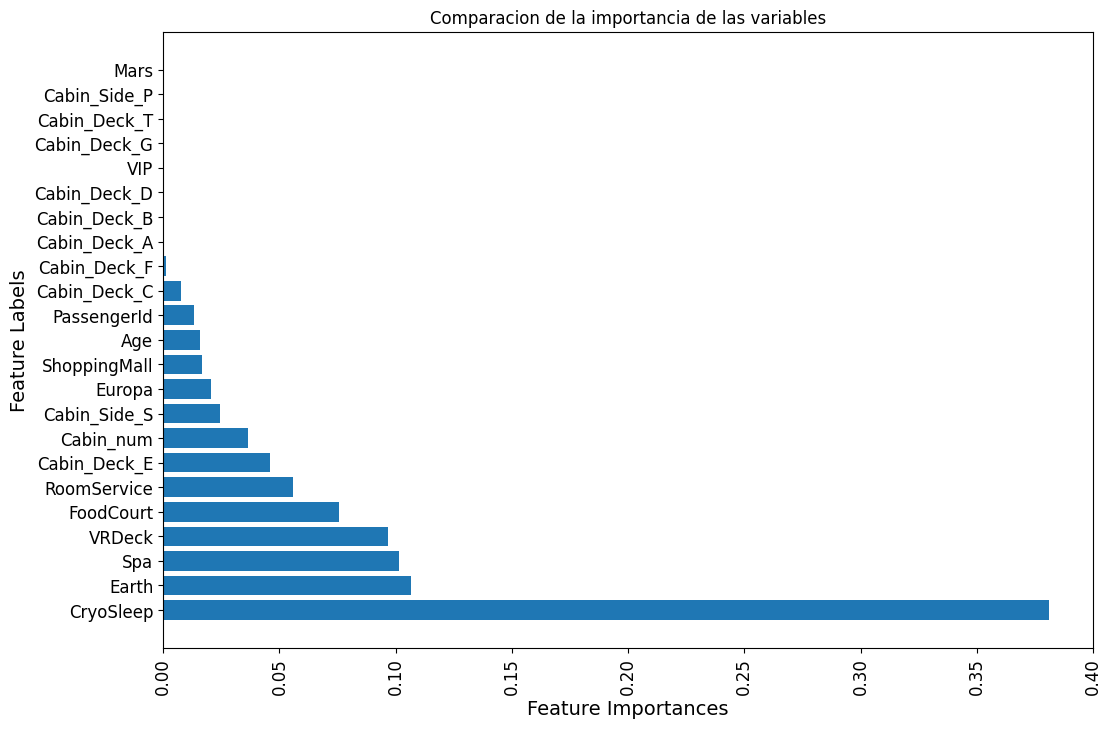

In [142]:

graph_feat(tuned_tree, X_train)

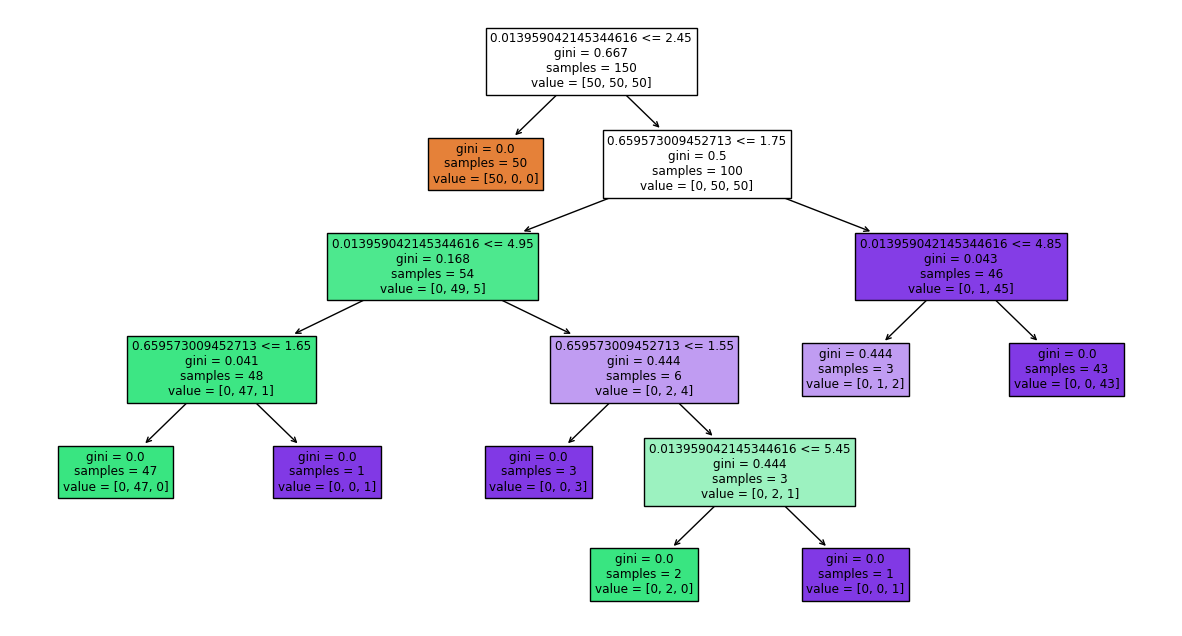

In [143]:
plt.figure(figsize=(15,8))
sklearn.tree.plot_tree(tree_clf,
               feature_names=tree.feature_importances_,
               filled = True);

Saving figure decision_tree_decision_boundaries_plot


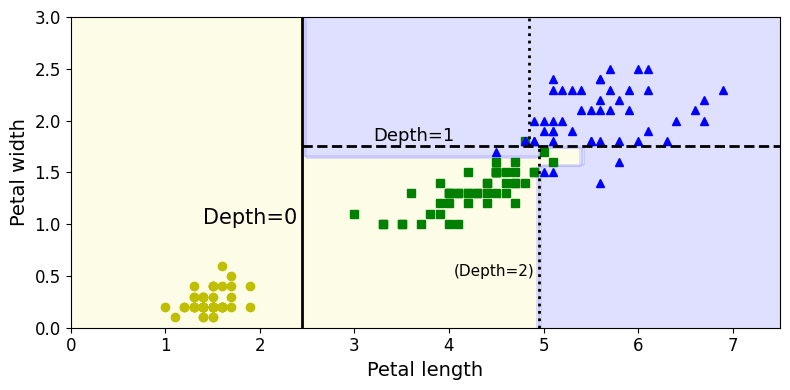

In [144]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "gs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "b^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show();

## Cargamos los datos de entrada del archivo .csv Test

In [145]:
# Load data
test = pd.read_csv('../data/Processed/test_processed.csv', sep=',')
df_test=pd.DataFrame(test)
df_test

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Earth,...,Cabin_Side_P,Cabin_Side_S,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T
0,0013_01,1,27.0,0,0.0,0.0,0.0,0.0,0.0,1,...,0,1,0,0,0,0,0,0,1,0
1,0018_01,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,1,...,0,1,0,0,0,0,0,1,0,0
2,0019_01,1,31.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0,1,0,0,1,0,0,0,0,0
3,0021_01,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,0,...,0,1,0,0,1,0,0,0,0,0
4,0023_01,0,20.0,0,10.0,0.0,635.0,0.0,0.0,1,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,34.0,0,0.0,0.0,0.0,0.0,0.0,1,...,0,1,0,0,0,0,0,0,1,0
4273,9269_01,0,42.0,0,0.0,847.0,17.0,10.0,144.0,1,...,1,0,0,0,0,0,0,0,1,0
4274,9271_01,1,26.0,0,0.0,0.0,0.0,0.0,0.0,0,...,1,0,0,0,0,1,0,0,0,0
4275,9273_01,0,26.0,0,0.0,2680.0,0.0,0.0,523.0,0,...,1,0,0,0,0,1,0,0,0,0


## Hacemos la prediccion

In [146]:
prediccion_test = pd.DataFrame(tuned_tree.predict(df_test))
prediccion_test['PassengerId'] =df_test['PassengerId']
prediccion_test = prediccion_test.rename(columns = {0:'Transported'})
prediccion_test = prediccion_test[['PassengerId','Transported']]
prediccion_test.to_csv('../data/output/Decision_Tree.csv', index=False)
prediccion_test

c:\Users\Alberto\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False
